In [53]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *

from trackeddy.physics import *

import matplotlib.pyplot as plt

#Allow interactive plots
%matplotlib inline

In [54]:
filepath = '/Users/jmtzmo/Downloads/sla_for_tracking/sla_0.25degs_interp_for_eddy_tracking_l4-duacs.nc'

In [55]:
# Open netcdf Dataset.
ncfile     = Dataset(filepath)
# Load data into memory
sla        = ncfile.variables['sla'][:]
lon        = ncfile.variables['longitude'][:]
lat        = ncfile.variables['latitude'][:]

In [56]:
filters = {'time':{'type':None,'t':None,'t0':None,'value':None},
        #    'spatial':{'type':None,'window':None,'mode':None}}
           'spatial':{'type':'moving','window':20,'mode':'uniform'}}

checkarea={'constant': np.inf} #Mesoscale scaling: 'mesoscale':2жпр.pi,

areamap = np.asarray([ [0, len(lon)], [0, len(lat)]]) # Global option

preferences={'ellipse':0.80,'eccentricity':0.95,'gaussian':0.8}

sla = np.ma.masked_where(np.isnan(sla),sla)


In [57]:
len(np.shape(sla))

3

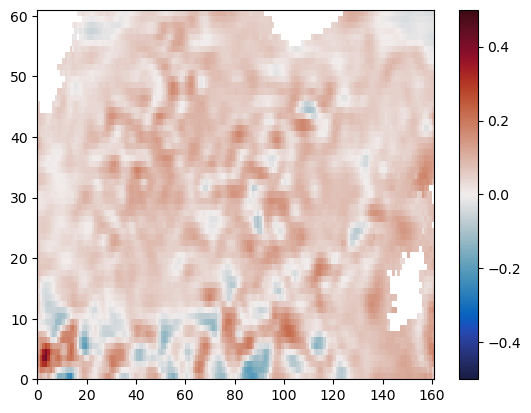

In [58]:
plt.pcolormesh(sla[0,:,:],vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)
plt.colorbar()

In [59]:
levels1 = {'max' :np.max(sla), 'min':0, 'step':0.01}

positive_eddies=analyseddyzt (sla, lon, lat, 0, 1, 1, levels1, preferences=preferences, areamap=areamap,
areaparms=checkarea,filters=filters,maskopt='gaussian',diagnostics=False,pprint=True)

 0% [==========>]100% | Elapsed Time: 0 s | Estimated Time: 0 s | Info: Init time |
(61, 161)
 0% [==========>]100% | Elapsed Time: 6 s | Estimated Time: 6 s | Info: # of E 474 ||


In [60]:
positive_eddy_field=reconstruct_syntetic(shape(sla),lon,lat,positive_eddies)

 0% [==========>]100% | Elapsed Time: 0 s | Estimated Time: 0 s | Info: eddyn_19 |


In [61]:
levels2 = {'max':np.min(sla), 'min':0, 'step':-0.01}

negative_eddies=analyseddyzt (sla, lon, lat, 0, 1, 1, levels2, preferences=preferences, areamap=areamap,
areaparms=checkarea, filters=filters, maskopt='gaussian', diagnostics=False,pprint=True)

 0% [==========>]100% | Elapsed Time: 0 s | Estimated Time: 0 s | Info: Init time |
(61, 161)
 0% [==========>]100% | Elapsed Time: 6 s | Estimated Time: 6 s | Info: # of E 486 ||


In [62]:
negative_eddy_field=reconstruct_syntetic(shape(sla),lon,lat,negative_eddies)

 0% [==========>]100% | Elapsed Time: 0 s | Estimated Time: 0 s | Info: eddyn_25 |


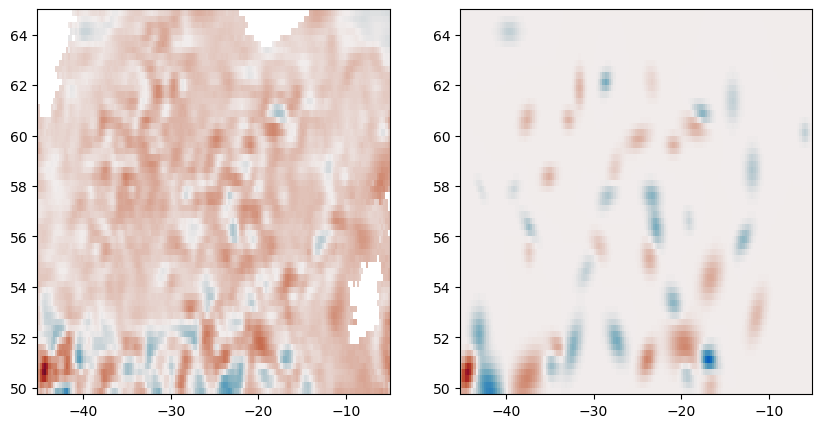

In [63]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].pcolormesh(lon,lat,sla[0,:,:],vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)

ax[1].pcolormesh(lon,lat,positive_eddy_field[0,:,:]+negative_eddy_field[0,:,:],vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)

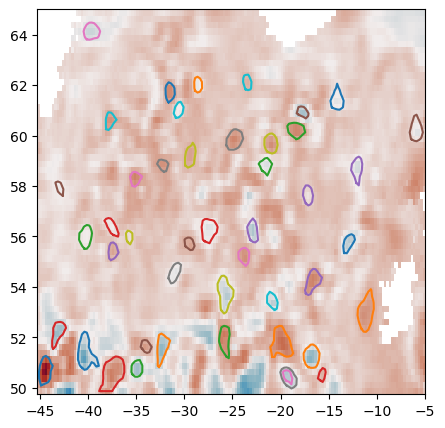

In [64]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.pcolormesh(lon,lat,sla[0,:,:],vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)

for eddy in positive_eddies:
    eddy
    plt.plot(positive_eddies[eddy]['contour'][0][0],positive_eddies[eddy]['contour'][0][1])

for eddy in negative_eddies:
    plt.plot(negative_eddies[eddy]['contour'][0][0],negative_eddies[eddy]['contour'][0][1])


In [5]:
filepath = '/Users/jmtzmo/Downloads/sla_for_tracking/interp_for_tracking/sla_0.25degs_interp_for_eddy_tracking_NATL.nc'

In [6]:
# Open netcdf Dataset.
ncfile     = Dataset(filepath)
# Load data into memory
sla_model        = ncfile.variables['sla'][:]
lon_model        = ncfile.variables['lon'][:]
lat_model        = ncfile.variables['lat'][:]

In [79]:
filters = {'time':{'type':None,'t':None,'t0':None,'value':None},
        #    'spatial':{'type':None,'window':None,'mode':None}}
           'spatial':{'type':'moving','window':20,'mode':'uniform'}}

checkarea={'constant': np.inf} #Mesoscale scaling: 'mesoscale':2жпр.pi,

areamap = np.asarray([ [0, lon_model.shape[1]], [0, lat_model.shape[0]]]) # Global option

preferences={'ellipse':0.80,'eccentricity':0.95,'gaussian':0.8}

sla_model = np.ma.masked_where(np.isnan(sla_model),sla_model)


In [80]:
areamap

array([[  0, 160],
       [  0,  60]])

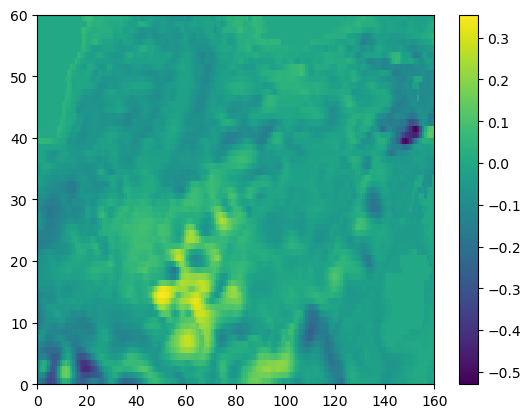

In [81]:
plt.pcolormesh(sla_model[0])
plt.colorbar()

In [82]:
levels1 = {'max' :np.max(sla_model), 'min':0, 'step':0.01}

positive_eddies_model=analyseddyzt (sla_model, lon_model[0,:], lat_model[:,0], 0, 1, 1, levels1, preferences=preferences, areamap=areamap,
areaparms=checkarea,filters=filters,maskopt='gaussian',diagnostics=False,pprint=True)

 0% [==========>]100% | Elapsed Time: 0 s | Estimated Time: 0 s | Info: Init time |
(60, 160)
 0% [==========>]100% | Elapsed Time: 4 s | Estimated Time: 4 s | Info: # of E 448 ||


In [83]:
positive_eddy_field=reconstruct_syntetic(shape(sla_model),lon_model[0,:], lat_model[:,0],positive_eddies_model)

 0% [==========>]100% | Elapsed Time: 0 s | Estimated Time: 0 s | Info: eddyn_25 |


In [84]:
levels2 = {'max':np.min(sla_model), 'min':0, 'step':-0.01}

negative_eddies_model=analyseddyzt (sla_model, lon_model[0,:], lat_model[:,0], 0, 1, 1, levels2, preferences=preferences, areamap=areamap,
areaparms=checkarea, filters=filters, maskopt='gaussian', diagnostics=False,pprint=True)

 0% [==========>]100% | Elapsed Time: 0 s | Estimated Time: 0 s | Info: Init time |
(60, 160)
 0% [==========>]100% | Elapsed Time: 5 s | Estimated Time: 5 s | Info: # of E 540 ||


In [85]:
negative_eddy_field=reconstruct_syntetic(shape(sla_model),lon_model[0,:], lat_model[:,0],negative_eddies_model)

 0% [==========>]100% | Elapsed Time: 0 s | Estimated Time: 0 s | Info: eddyn_26 |


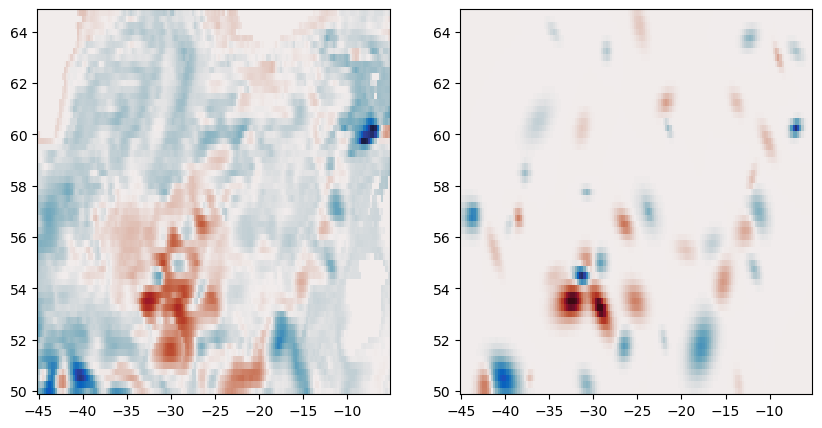

In [86]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].pcolormesh(lon_model,lat_model,sla_model[0,:,:],vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)

ax[1].pcolormesh(lon_model,lat_model,positive_eddy_field[0,:,:]+negative_eddy_field[0,:,:],vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)

Text(0.5, 1.0, 'Model')

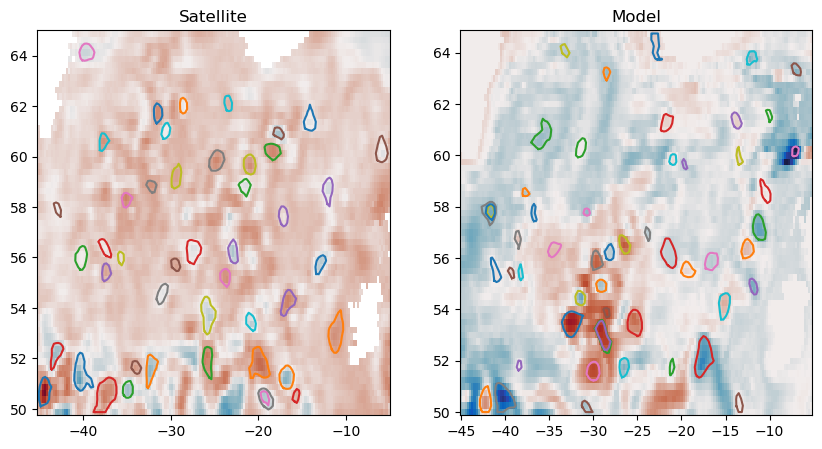

In [88]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].pcolormesh(lon,lat,sla[0,:,:],vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)

for eddy in positive_eddies:
    eddy
    ax[0].plot(positive_eddies[eddy]['contour'][0][0],positive_eddies[eddy]['contour'][0][1])

for eddy in negative_eddies:
    ax[0].plot(negative_eddies[eddy]['contour'][0][0],negative_eddies[eddy]['contour'][0][1])


ax[1].pcolormesh(lon_model,lat_model,sla_model[0,:,:],vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)

for eddy in positive_eddies_model:
    eddy
    ax[1].plot(positive_eddies_model[eddy]['contour'][0][0],positive_eddies_model[eddy]['contour'][0][1])

for eddy in negative_eddies_model:
    ax[1].plot(negative_eddies_model[eddy]['contour'][0][0],negative_eddies_model[eddy]['contour'][0][1])


ax[0].set_title('Satellite')

ax[1].set_title('Model')
